In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('Regression_Iso.txt', header = 0)
data.tail()

,Age,Slope,Intercept,Slope_Error,Intercept_Error,R_Value,(B-V)TurnOff,MvTurnOff,Ajustadas/Total
45,7.0,6.443027,0.581311,0.067584,0.033600,0.999615,-0.25,-2.74,0.140625= 9/64
46,6.9,7.021726,0.353671,0.183149,0.059610,0.997627,-0.27,-3.52,0.15517241379310345= 9/58
47,6.8,7.190194,0.252638,0.163916,0.054324,0.998186,-0.28,-3.94,0.15254237288135594= 9/59
48,6.7,7.317416,0.179871,0.187906,0.061103,0.997373,-0.29,-4.32,0.16129032258064516= 10/62
49,6.6,7.236652,0.223766,0.167718,0.056032,0.998125,-0.29,-3.90,0.15= 9/60


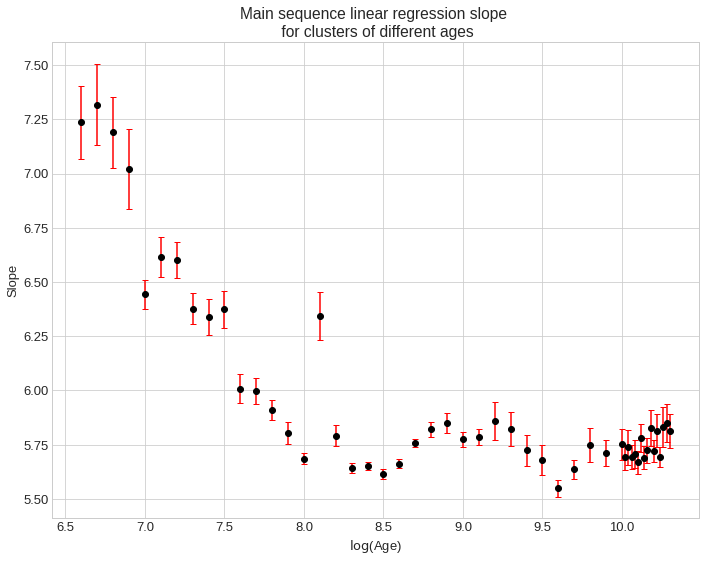

In [3]:
plt.style.use('seaborn-whitegrid')
plt.rc('xtick', labelsize=13) 
plt.rc('ytick', labelsize=13) 


font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 13}

plt.rc('font', **font)


fig, ax = plt.subplots(figsize=(10,8))
ax.errorbar( data['Age'], data['Slope'], yerr = data['Slope_Error'], fmt = 'o' , color = 'black', ecolor = 'red', capsize = 3)
ax.set_ylabel('Slope')
ax.set_xlabel(r'$\log$' + '(Age)')
ax.set_title('Main sequence linear regression slope \n for clusters of different ages' )
plt.tight_layout()
plt.savefig('images/slope.png', format = 'png', dpi = 1000)

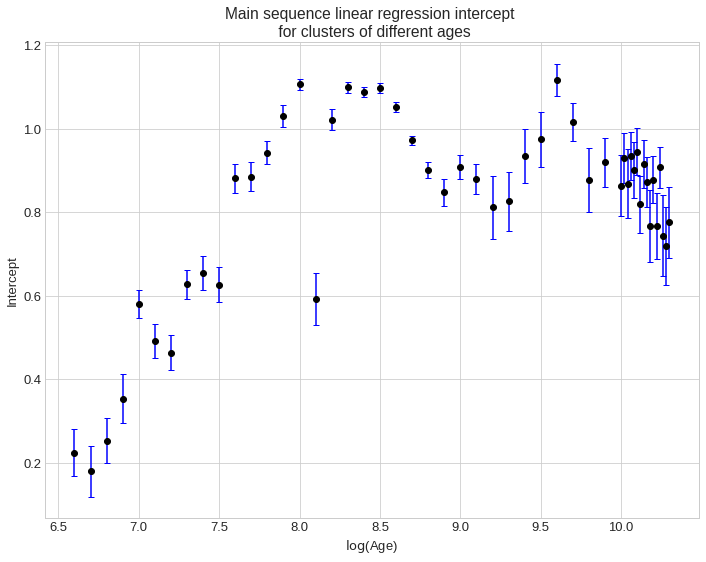

In [4]:
plt.rc('xtick', labelsize=13) 
plt.rc('ytick', labelsize=13) 


font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 13}

plt.rc('font', **font)


fig, ax = plt.subplots(figsize=(10,8))
ax.errorbar(data['Age'], data['Intercept'],  yerr = data['Intercept_Error'], fmt = 'o' , color = 'black', ecolor = 'blue', capsize = 3)
ax.set_ylabel('Intercept')
ax.set_xlabel(r'$\log$' + '(Age)')
ax.set_title('Main sequence linear regression intercept \n for clusters of different ages' )  #
plt.tight_layout()
plt.savefig('images/intercept.png', format = 'png', dpi = 1000)

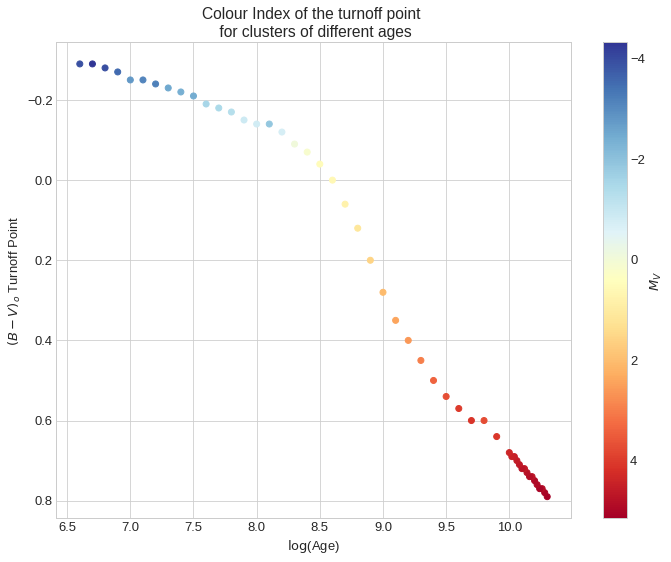

In [5]:
plt.rc('xtick', labelsize=13) 
plt.rc('ytick', labelsize=13) 


font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 13}

plt.rc('font', **font)



x = data['MvTurnOff'] #para o scatter
fig,ax = plt.subplots(figsize=(10,8))
plt.gca().invert_yaxis()
#plt.errorbar( data['Age'], data['(B-V)TurnOff'], fmt = 'o' , color = 'black', ecolor = 'red')
plt.scatter( data['Age'], data['(B-V)TurnOff'],  c = x, cmap = 'RdYlBu_r') #para reverter o colormap, bwr_r, _r means reversed!
ax.set_ylabel(r'$(B-V)_o$'+ ' Turnoff Point')
ax.set_xlabel(r'$\log$'+ '(Age)')

cbar = plt.colorbar(label = r'$M_V$')
cbar.ax.invert_yaxis() 
ax.set_title('Colour Index of the turnoff point \n for clusters of different ages' )
plt.tight_layout()
plt.savefig('images/colour_index.png', format = 'png', dpi = 1000)

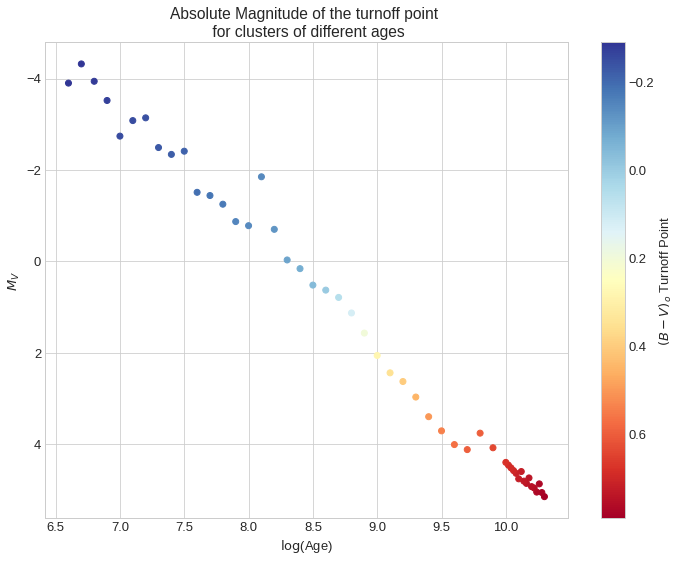

In [6]:
plt.rc('xtick', labelsize=13) 
plt.rc('ytick', labelsize=13) 


font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 13}

plt.rc('font', **font)

t = data['(B-V)TurnOff']
fig, ax = plt.subplots(figsize=(10,8))
plt.gca().invert_yaxis()
#plt.errorbar(data['Age'], data['MvTurnOff'], fmt = 'o' , color = 'black', ecolor = 'red')
plt.scatter( data['Age'], data['MvTurnOff'],  c = t, cmap = 'RdYlBu_r')
ax.set_ylabel(r'$M_V $')
ax.set_xlabel(r'$\log $' +'(Age)');
cbar = plt.colorbar(label = r'$(B-V)_o$'+' Turnoff Point')
cbar.ax.invert_yaxis() 

ax.set_title('Absolute Magnitude of the turnoff point \n for clusters of different ages' )
plt.tight_layout()
plt.savefig('images/Mv.png', format = 'png', dpi = 1000)

In [7]:
#V - Mv = 6 
#V0 = V - Av #= V-3.1*0.1,  0.1 = E(B-V)/  E(B-V) avermelhamento, Av extincao ### V-Mv = 6, V0 = V-Av, V = V0

In [8]:
#V = a*(B-V) + b #aglomerado simulado
#Mv = a*(B-V)o + bo #isocronas

#(B-V) = (B-V)o + E(B-V)

#Av = 3.1*E(B-V)

#V - Mv = a[(B-V) - (B-V)o] + (b-bo)

#V - Mv = a*E(B-V)  + (b-bo)

In [9]:
#B0 = B - Ab

In [10]:
#V0 = V - Av

In [11]:
#B0 - V0 = (B-V) - (+Ab - Av)

In [12]:
#vo - Mv = a*E + (b-b0) - Av
# d = (vo - Mv + 5)/5

In [13]:
info = pd.read_csv('../Ag_Simulados/Idades_Aglomerados.txt', header = 0)
info.head()

,Name,log(Age),E(B-V),moddist
0,AG1,7.2,0.1,6
1,AG2,7.8,0.5,8
2,AG3,9.0,0.3,7


In [14]:
isocronas = pd.read_csv('Regression_Iso.txt')

In [15]:
def distancia(a,b,b0,E):
    return 10**((a*E + (b-b0) - E*3.1 + 5 )/5)

In [16]:
##AG1

dataag1 = pd.read_csv('../Ag_Simulados/LinearRegressAG1.txt', header = 0)
d1 = info[info['Name'] == 'AG1']
idade1 = d1['log(Age)']
isocro1 = isocronas[isocronas['Age'] == idade1.item()]

print('Distancia Calculada pelo Metodo: ' + str(distancia(dataag1['Slope'].item(),dataag1[' Intercept'].item(),isocro1['Intercept'].item(), d1['E(B-V)'].item())))
print('Distancia Teorica: ' + str(10**(((d1['moddist'].item() - 3.1*d1['E(B-V)'].item()) + 5)/5)))


Distancia Calculada pelo Metodo: 212.47945902965458
Distancia Teorica: 137.4041975012515


In [17]:
##AG2

dataag2 = pd.read_csv('../Ag_Simulados/LinearRegressAG2.txt', header = 0)
d2 = info[info['Name'] == 'AG2']
idade2 = d2['log(Age)']
isocro2 = isocronas[isocronas['Age'] == idade2.item()]

print('Distancia Calculada pelo Metodo: ' + str(distancia(dataag2['Slope'].item(),dataag2[' Intercept'].item(),isocro2['Intercept'].item(), d2['E(B-V)'].item())))
print('Distancia Teorica: ' + str(10**(((d2['moddist'].item() - 3.1*d2['E(B-V)'].item()) + 5)/5)))


Distancia Calculada pelo Metodo: 206.25702587588438
Distancia Teorica: 194.98445997580455


In [18]:
##AG3

dataag3 = pd.read_csv('../Ag_Simulados/LinearRegressAG3.txt', header = 0)
d3 = info[info['Name'] == 'AG3']
idade3 = d3['log(Age)']
isocro3 = isocronas[isocronas['Age'] == idade3.item()]

print('Distancia Calculada pelo Metodo: ' + str(distancia(dataag3['Slope'].item(),dataag3[' Intercept'].item(),isocro3['Intercept'].item(), d3['E(B-V)'].item())))
print('Distancia Teorica: ' + str(10**(((d3['moddist'].item() - 3.1*d3['E(B-V)'].item()) + 5)/5)))


Distancia Calculada pelo Metodo: 140.95205061004438
Distancia Teorica: 163.68165214278085
